Epoch: 1 | Loss: 1.1102288167665275
Epoch: 2 | Loss: 0.957168698928832
Epoch: 3 | Loss: 0.36385012294151925
Epoch: 4 | Loss: 0.27086572866630504
Epoch: 5 | Loss: 0.18147678615638063
Epoch: 6 | Loss: 0.14935295959108238
Epoch: 7 | Loss: 0.1493130584434679
Epoch: 8 | Loss: 0.1399954277848431
Epoch: 9 | Loss: 0.13814217751944396
Epoch: 10 | Loss: 0.13256282051445653
Epoch: 11 | Loss: 0.13421119494196548
Epoch: 12 | Loss: 0.1317441482913344
Epoch: 13 | Loss: 0.1317485721174928
Epoch: 14 | Loss: 0.12964518962685315
Epoch: 15 | Loss: 0.12920483950417466
Epoch: 16 | Loss: 0.12464291457459602
Epoch: 17 | Loss: 0.12348185893568155
Epoch: 18 | Loss: 0.12488586106012164
Epoch: 19 | Loss: 0.12670854121779765
Epoch: 20 | Loss: 0.12534448335145865
Epoch: 21 | Loss: 0.13607636394110703
Epoch: 22 | Loss: 0.13469199632714332
Epoch: 23 | Loss: 0.1272051306471478
Epoch: 24 | Loss: 0.11762778169427295
Epoch: 25 | Loss: 0.1170285563462123
Epoch: 26 | Loss: 0.11955834631513707
Epoch: 27 | Loss: 0.1205223437

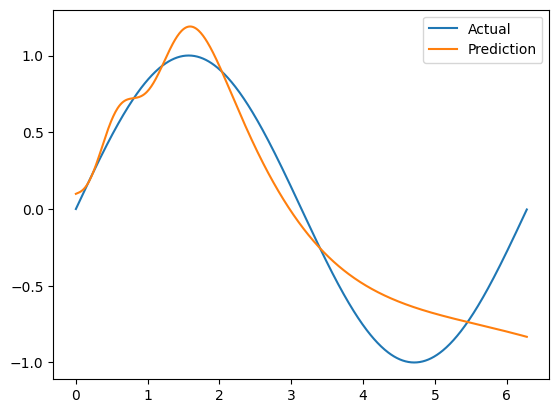

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import numpytorch as torch
import numpytorch.nn as nn
import numpytorch.optim as optim
from numpytorch.utils.data import TensorDataset
from numpytorch.utils.data import mnist_reader
import d2lnumpy as d2l

# Create a custom neural network class

model1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(1, 16),
    nn.GeLU(),
    nn.Linear(16, 16),
    nn.GeLU(),
    nn.Linear(16, 1),
)

# Create an instance of the neural network class
# model1 = MyModel()

# Load the training data
X_train = np.arange(0, 2 * np.pi, 0.01).reshape(-1, 1).astype(np.float64)
y_train = np.sin(X_train).astype(np.float64)

# Create a dataset object for the training data
train_data = TensorDataset(X_train, y_train, batch_size=32, shuffle=True)


# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model1.layers, lr=0.01)


# Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    running_loss_train = 0

    # Iterate over the batches of the training data
    for i, (X, y) in enumerate(train_data):
        # Forward pass
        y_hat = model1.forward(X)

        # Compute the loss
        loss = loss_fn.forward(y_pred=y_hat, y_true=y).mean()

        # Backpropagate the loss
        grad = loss_fn.backward(y_pred=y_hat, y_true=y)
        model1.backward(grad)

        # Update the parameters
        optimizer.step()

        # Accumulate the running loss
        running_loss_train += loss

    # Average the running loss
    running_loss_train /= len(train_data)

    #                  rint the epoch number and the loss
    print(f"Epoch: {epoch+1} | Loss: {running_loss_train}")


# Try plotting the results

train_pred = model1.forward(X_train)

# plt.scatter(X_train, train_pred)
plt.plot(X_train, y_train, label='Actual')
plt.plot(X_train, train_pred, label='Prediction')
plt.legend()
plt.show()


# Save the model weights
# model1.save('sin-model-1')

KeyboardInterrupt: 

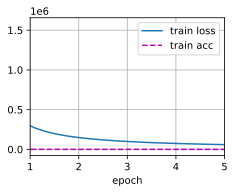

In [2]:
# class MyModel2(nn.Module):
#     def __init__(self):
#         super().__init__()

#         # Define the layers of the neural network
#         self.layers = [
#             nn.Flatten(),
#             nn.Linear(784, 256),
#             nn.GeLU(),
#             nn.Linear(256, 32),
#             nn.GeLU(),
#             nn.Linear(32, 1),
#         ]
# net = nn.Sequential(
#     nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
#     nn.AvgPool2d(kernel_size=2, stride=2),
#     nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
#     nn.AvgPool2d(kernel_size=2, stride=2),
#     nn.Flatten(),
#     nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
#     nn.Linear(120, 84), nn.Sigmoid(),
#     nn.Linear(84, 10))
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10),
)

X_train, y_train = mnist_reader.load_mnist('dataset', kind='train')
X_test, y_test = mnist_reader.load_mnist('dataset', kind='t10k')

# Create an instance of the neural network class
# net = MyModel2()

# print(X_train)
# print(y_train)

num_batches = 32
# Create a dataset object for the training data
train_data = TensorDataset(
    X_train, y_train, batch_size=num_batches, shuffle=True)

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(net.layers, lr=0.01)


# Training Loop
num_epochs = 5
for epoch in range(num_epochs):
    running_loss_train = 0

    metric = d2l.Accumulator(3)
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc'])
    # Iterate over the batches of the training data
    for i, (X, y) in enumerate(train_data):
        # Forward pass
        y_hat = net.forward(X)

        # Compute the loss
        loss = loss_fn.forward(y_pred=y_hat, y_true=y).mean()

        metric.add(loss * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
        train_l = metric[0] / metric[2]
        train_acc = metric[1] / metric[2]

        if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
            animator.add(epoch + (i + 1) / num_batches,
                         (train_l, train_acc, None))
        # Backpropagate the loss
        grad = loss_fn.backward(y_pred=y_hat, y_true=y)
        net.backward(grad)

        # Update the parameters
        optimizer.step()

        # Accumulate the running loss
        running_loss_train += loss

    # Average the running loss
    running_loss_train /= len(train_data)

    #                  rint the epoch number and the loss
    print(f"Epoch: {epoch+1} | Loss: {running_loss_train}")

    # Try plotting the results

train_pred = net.forward(X_train)

# plt.scatter(X_train, train_pred)
x_label = np.arange(0, len(X_train))
plt.plot(x_label, y_train, label='Actual')
plt.plot(x_label, train_pred, label='Prediction')
plt.legend()
plt.show()


# Save the model weights
net.save('img-model-1')


# Load model
loaded_model = MyModel()  # Random weights
loaded_model.load('img-model-1.npz')  # Loads saved weights into loaded_model